In [68]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_train = pd.read_csv('xor_train.csv')
df_test = pd.read_csv('xor_test.csv')
df_valid = pd.read_csv('xor_valid.csv')

In [26]:
print(df_train[['x1', 'x2']].head(), df_train[['label']].head())

       x1      x2
0 -0.9310  0.9441
1  0.6652  0.0839
2 -0.5922 -1.6241
3  1.7183 -0.1137
4 -0.5269 -1.3189    label
0    0.0
1    1.0
2    1.0
3    0.0
4    1.0


In [11]:
X_train = torch.tensor(df_train[['x1', 'x2']].values, dtype=torch.float32)
y_train = torch.tensor(df_train['label'].values, dtype=torch.float32)

X_test = torch.tensor(df_test[['x1', 'x2']].values, dtype=torch.float32)
y_test = torch.tensor(df_test['label'].values, dtype=torch.float32)

X_valid = torch.tensor(df_valid[['x1', 'x2']].values, dtype=torch.float32)
y_valid = torch.tensor(df_valid['label'].values, dtype=torch.float32)

In [ ]:
# This cell creates a mesh grid covering the input space that'll be used later to visualize the decision boundaries.
# The idea is to pass a grid of points through the network, have it classify those points and then plot a heatmap
x1_min, x1_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
x2_min, x2_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5

x1_range = np.linspace(x1_min, x1_max, 200)
x2_range = np.linspace(x2_min, x2_max, 200)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Flatten the grid to pass through the model
grid_points = np.c_[x1_grid.ravel(), x2_grid.ravel()]
grid_tensor = torch.tensor(grid_points, dtype=torch.float32)

In [12]:
print(X_train.shape, y_train.shape, X_test.shape, X_valid.shape)

torch.Size([200, 2]) torch.Size([200]) torch.Size([200, 2]) torch.Size([200, 2])


In [55]:
class BinaryClassifier(torch.nn.Module):
    def __init__(self, hl_size):
        super().__init__()
        self.layer1 = torch.nn.Linear(2,hl_size)
        self.layer2 = torch.nn.Linear(hl_size,1)
    def forward(self, x):
        o = self.layer1(x)
        o = torch.relu(o)
        o = self.layer2(o)
        o = torch.sigmoid(o)
        return o

In [65]:
def train_model(hl_size):
    model = BinaryClassifier(hl_size)
    loss_function = torch.nn.BCELoss()
    gd = torch.optim.Adam(model.parameters(), lr=0.01)

    epochs = 1000
    loss_array = []
    for epoch in range(epochs):
        predictions = model(X_train)
        loss = loss_function(predictions.squeeze(), y_train)
        loss.backward()
        gd.step()
        gd.zero_grad()
        loss_array.append(loss.item())
        # if epoch%100 == 0:
        #     print(f"Epoch {epoch+1}, Loss: {loss.item()}")
    
    model.eval()
    with torch.no_grad():
        predictions = model(X_test)
        loss = loss_function(predictions.squeeze(), y_test)

    print(f'\nTest Loss: {loss.item():.4f}')
    print(list(model.parameters()))
    plt.plot(loss_array)
    plt.xlabel('Epoch')
    plt.ylabel('Training Loss')
    plt.title('Training Loss over Time')
    plt.grid(True)
    plt.show()


Training model with hidden layer size 2, iteration 1

Test Loss: 0.5632
[Parameter containing:
tensor([[ 1.5354,  1.4071],
        [-1.1955, -1.4894]], requires_grad=True), Parameter containing:
tensor([-0.8217,  0.0505], requires_grad=True), Parameter containing:
tensor([[1.5564, 1.2103]], requires_grad=True), Parameter containing:
tensor([-1.9900], requires_grad=True)]


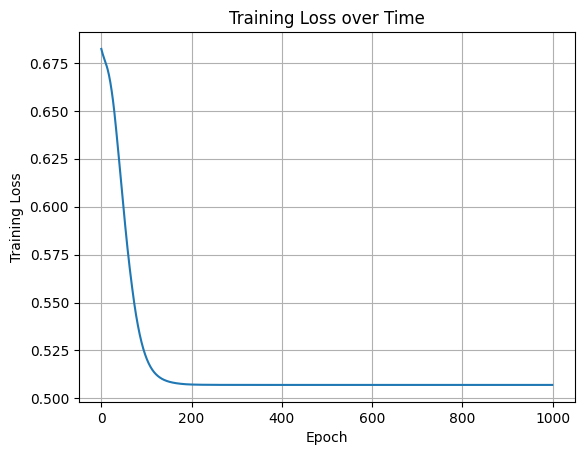


Training model with hidden layer size 2, iteration 2

Test Loss: 0.4384
[Parameter containing:
tensor([[-4.1175, -0.6760],
        [-5.4948,  1.0142]], requires_grad=True), Parameter containing:
tensor([-0.6423, -0.9475], requires_grad=True), Parameter containing:
tensor([[ 5.2998, -4.0756]], requires_grad=True), Parameter containing:
tensor([-0.3329], requires_grad=True)]


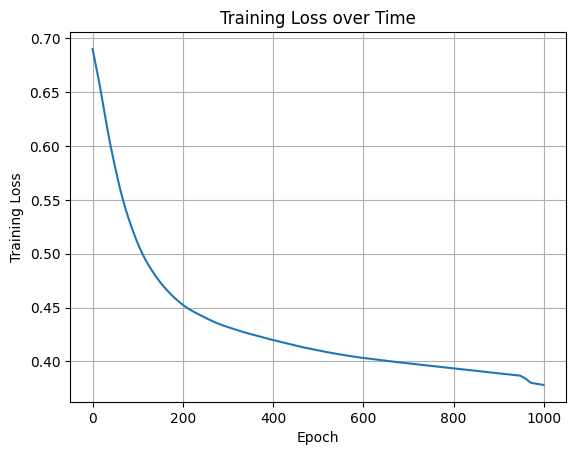


Training model with hidden layer size 2, iteration 3

Test Loss: 0.6349
[Parameter containing:
tensor([[-0.9816,  1.0959],
        [-0.0247,  0.0105]], requires_grad=True), Parameter containing:
tensor([-0.6457, -0.2729], requires_grad=True), Parameter containing:
tensor([[-1.4961,  0.5700]], requires_grad=True), Parameter containing:
tensor([0.1304], requires_grad=True)]


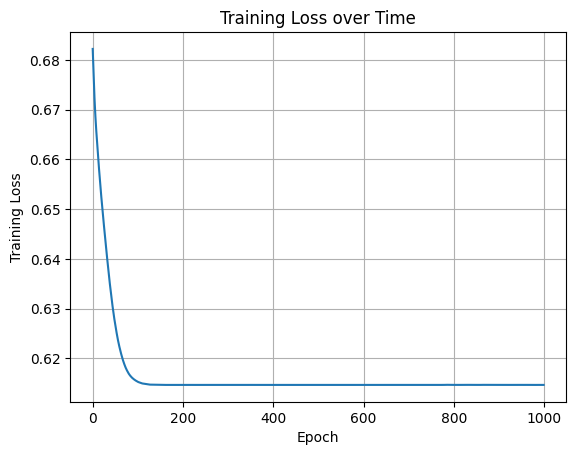


Training model with hidden layer size 3, iteration 1

Test Loss: 0.5035
[Parameter containing:
tensor([[-1.4221,  1.6850],
        [-0.1084,  0.3038],
        [ 1.4342, -1.2749]], requires_grad=True), Parameter containing:
tensor([-0.1563, -0.8120,  0.1156], requires_grad=True), Parameter containing:
tensor([[-1.4799, -0.0240, -1.6855]], requires_grad=True), Parameter containing:
tensor([2.0079], requires_grad=True)]


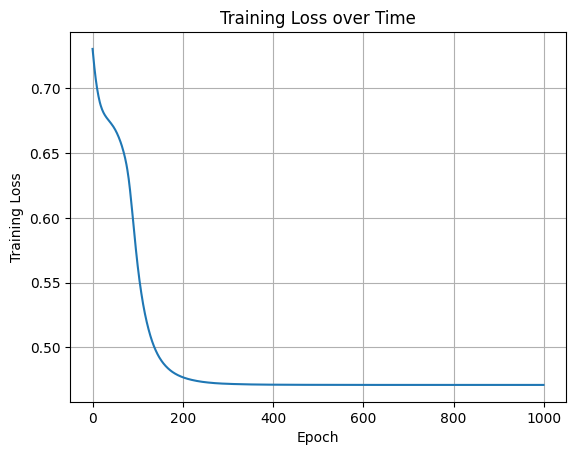


Training model with hidden layer size 3, iteration 2

Test Loss: 0.0405
[Parameter containing:
tensor([[ 6.8507, -0.4425],
        [ 5.4946,  6.1717],
        [-1.0511,  6.3138]], requires_grad=True), Parameter containing:
tensor([ 0.1129, -0.8097, -0.1871], requires_grad=True), Parameter containing:
tensor([[-4.1194,  5.4129, -5.2858]], requires_grad=True), Parameter containing:
tensor([3.3612], requires_grad=True)]


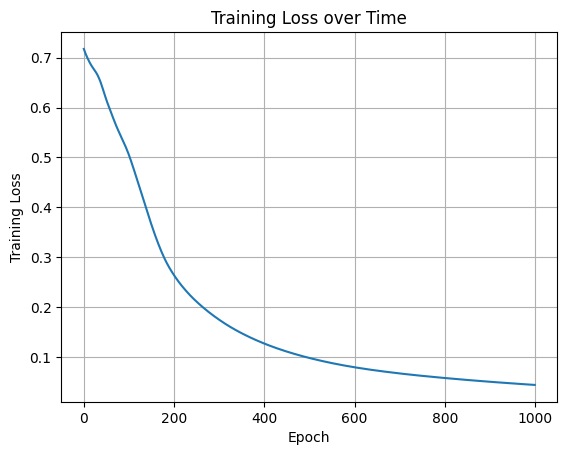


Training model with hidden layer size 3, iteration 3

Test Loss: 0.0713
[Parameter containing:
tensor([[ 0.4995, -5.7702],
        [-5.5246, -5.7668],
        [-5.4254,  0.7493]], requires_grad=True), Parameter containing:
tensor([ 0.2607, -0.2501, -0.0130], requires_grad=True), Parameter containing:
tensor([[-4.4125,  4.4733, -4.7237]], requires_grad=True), Parameter containing:
tensor([2.9728], requires_grad=True)]


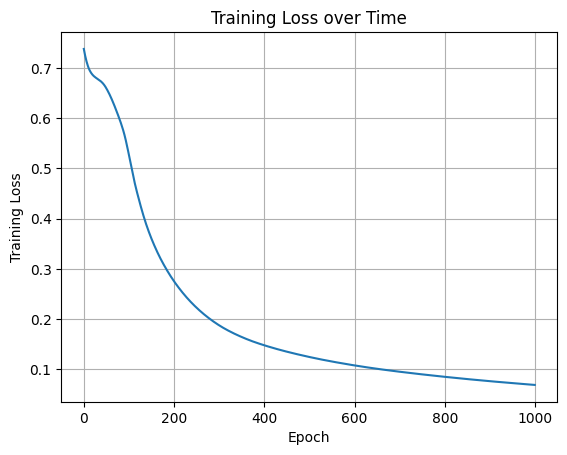


Training model with hidden layer size 4, iteration 1

Test Loss: 0.0674
[Parameter containing:
tensor([[-5.2918,  0.6742],
        [ 0.5671, -7.0902],
        [-4.5869, -5.0777],
        [ 0.3303, -4.5900]], requires_grad=True), Parameter containing:
tensor([ 0.0099,  0.2476, -0.1446,  0.1655], requires_grad=True), Parameter containing:
tensor([[-4.9315, -2.6910,  5.5070, -1.9406]], requires_grad=True), Parameter containing:
tensor([2.8342], requires_grad=True)]


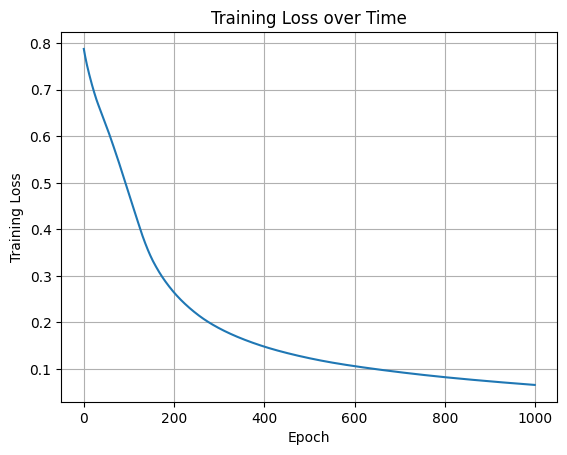


Training model with hidden layer size 4, iteration 2

Test Loss: 0.0282
[Parameter containing:
tensor([[-2.9341,  5.4738],
        [-2.6032, -4.6280],
        [ 3.6995, -3.1169],
        [ 5.1686,  4.8701]], requires_grad=True), Parameter containing:
tensor([-0.2141,  0.4402,  0.1065, -0.4198], requires_grad=True), Parameter containing:
tensor([[-3.6206,  3.4455, -5.1145,  4.1318]], requires_grad=True), Parameter containing:
tensor([-0.4021], requires_grad=True)]


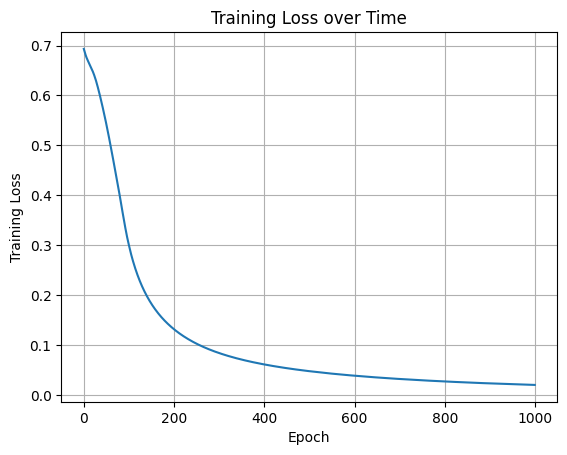


Training model with hidden layer size 4, iteration 3

Test Loss: 0.3934
[Parameter containing:
tensor([[-0.1211, -0.0963],
        [ 1.1653,  6.5649],
        [-1.5621,  7.2958],
        [ 0.0732, -0.1553]], requires_grad=True), Parameter containing:
tensor([-0.6989, -1.2223, -1.3109, -0.5246], requires_grad=True), Parameter containing:
tensor([[ 0.2071,  4.7018, -4.2585,  0.0684]], requires_grad=True), Parameter containing:
tensor([-0.1632], requires_grad=True)]


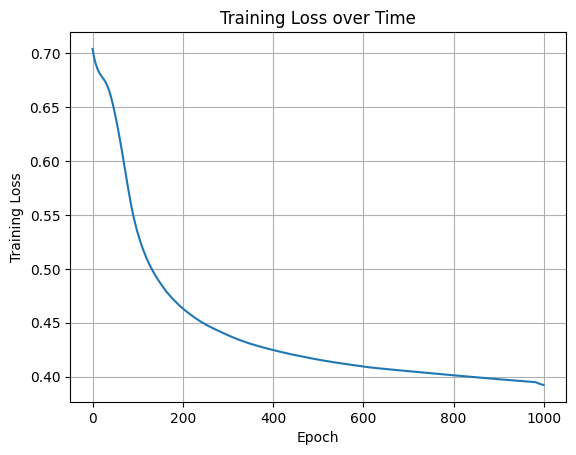


Training model with hidden layer size 5, iteration 1

Test Loss: 0.0263
[Parameter containing:
tensor([[ 0.1785, -0.1325],
        [ 4.4653, -4.1636],
        [-4.1046,  4.3611],
        [ 4.8885,  3.2659],
        [-3.1154, -4.6714]], requires_grad=True), Parameter containing:
tensor([-0.5331, -0.0058, -0.1574, -0.7668, -0.2699], requires_grad=True), Parameter containing:
tensor([[-0.0217, -4.3276, -3.1029,  4.3730,  3.9394]], requires_grad=True), Parameter containing:
tensor([1.0029], requires_grad=True)]


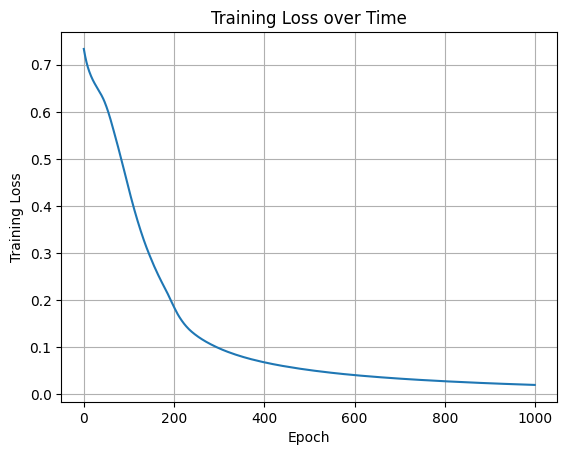


Training model with hidden layer size 5, iteration 2

Test Loss: 0.0673
[Parameter containing:
tensor([[ 0.3977, -4.9919],
        [-2.8099,  0.3850],
        [-5.1849, -5.6753],
        [-0.0253,  0.0442],
        [-3.7731,  0.5106]], requires_grad=True), Parameter containing:
tensor([ 0.2219, -0.0024, -0.2170, -0.3174, -0.0030], requires_grad=True), Parameter containing:
tensor([[-5.4900e+00, -3.3544e+00,  4.8837e+00,  4.8030e-03, -4.4612e+00]],
       requires_grad=True), Parameter containing:
tensor([3.0734], requires_grad=True)]


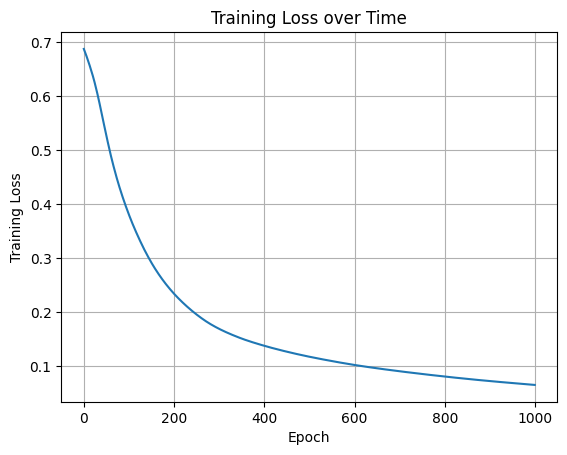


Training model with hidden layer size 5, iteration 3

Test Loss: 0.0288
[Parameter containing:
tensor([[-3.6517, -3.8214],
        [ 0.3014,  0.0603],
        [-4.2136,  4.8259],
        [ 4.0134, -3.8944],
        [ 3.7677,  3.9047]], requires_grad=True), Parameter containing:
tensor([-0.1886, -0.7383, -0.1813,  0.0180, -0.6604], requires_grad=True), Parameter containing:
tensor([[ 3.8782,  0.1921, -3.4989, -3.6858,  4.4790]], requires_grad=True), Parameter containing:
tensor([0.6692], requires_grad=True)]


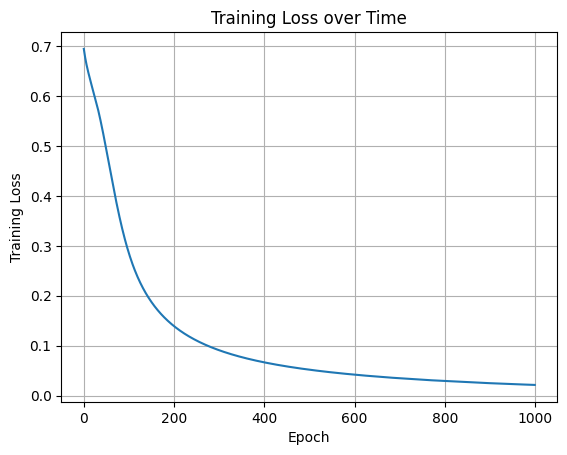


Training model with hidden layer size 6, iteration 1

Test Loss: 0.0205
[Parameter containing:
tensor([[-1.6941, -3.5272],
        [-2.3038, -5.1438],
        [ 6.4014,  3.0292],
        [ 3.0121, -3.2548],
        [ 2.1874, -4.4312],
        [-3.7898,  2.6812]], requires_grad=True), Parameter containing:
tensor([-0.1057, -0.1296, -0.9167,  0.1086,  0.0198, -0.0874],
       requires_grad=True), Parameter containing:
tensor([[ 3.0309,  4.5753,  4.0543, -4.6043, -4.2017, -4.2265]],
       requires_grad=True), Parameter containing:
tensor([1.1761], requires_grad=True)]


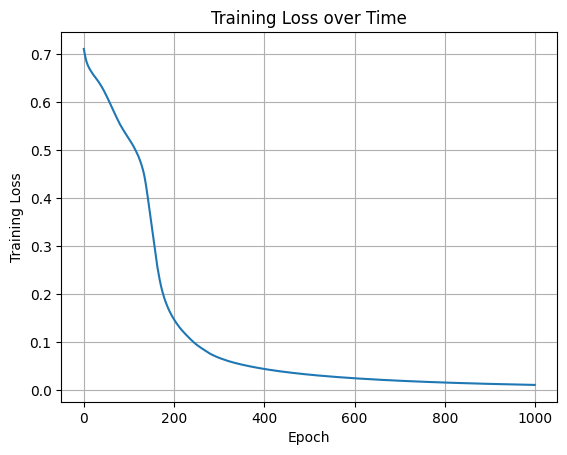


Training model with hidden layer size 6, iteration 2

Test Loss: 0.0261
[Parameter containing:
tensor([[ 1.5715, -4.9470],
        [ 2.8056, -2.3557],
        [ 1.1356, -3.0055],
        [ 4.3465,  4.0520],
        [-4.6313,  3.4591],
        [-3.9156, -5.3325]], requires_grad=True), Parameter containing:
tensor([ 0.2025,  0.0792,  0.1193, -0.5628, -0.1164,  0.3448],
       requires_grad=True), Parameter containing:
tensor([[-2.7712, -2.7052, -1.1049,  3.6162, -4.0937,  4.3618]],
       requires_grad=True), Parameter containing:
tensor([0.1328], requires_grad=True)]


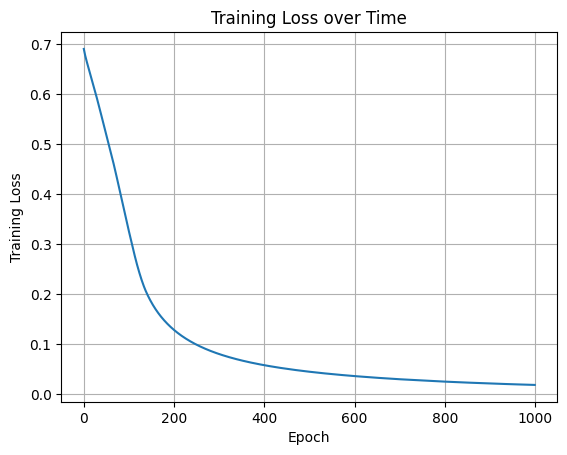


Training model with hidden layer size 6, iteration 3

Test Loss: 0.0284
[Parameter containing:
tensor([[-3.7617, -4.7850],
        [ 3.7234, -4.0276],
        [-2.2276,  2.7767],
        [ 4.6106,  5.4259],
        [-1.7368,  1.2967],
        [-2.1506,  3.4166]], requires_grad=True), Parameter containing:
tensor([ 0.3764,  0.1491, -0.1045, -0.5514, -0.0412, -0.1306],
       requires_grad=True), Parameter containing:
tensor([[ 3.3320, -3.9716, -2.0989,  3.7353, -0.8288, -3.8284]],
       requires_grad=True), Parameter containing:
tensor([-0.0404], requires_grad=True)]


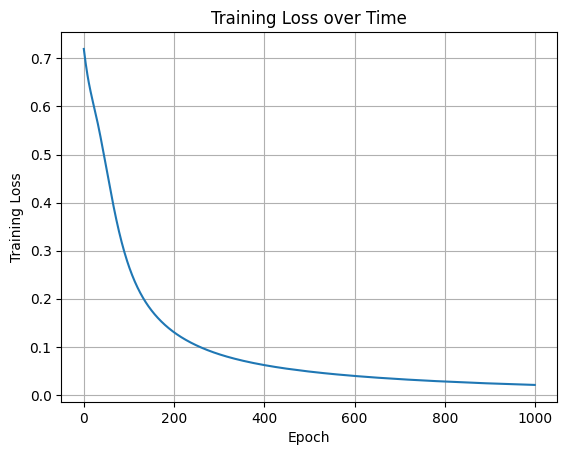


Training model with hidden layer size 7, iteration 1

Test Loss: 0.0245
[Parameter containing:
tensor([[ 0.3305,  0.1678],
        [ 4.2472,  3.7422],
        [-2.8651,  5.0889],
        [ 4.0343, -4.2972],
        [ 2.8037,  3.2956],
        [-1.0738, -0.9455],
        [-2.7034, -5.6427]], requires_grad=True), Parameter containing:
tensor([-0.6367, -0.5976, -0.1730,  0.1350, -0.6819,  1.8786, -0.2887],
       requires_grad=True), Parameter containing:
tensor([[ 0.0696,  4.0971, -4.3212, -5.0180,  2.6658,  1.5121,  3.6444]],
       requires_grad=True), Parameter containing:
tensor([-1.1516], requires_grad=True)]


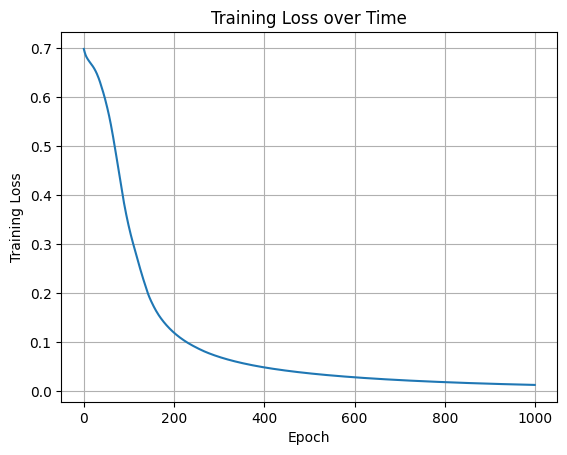


Training model with hidden layer size 7, iteration 2

Test Loss: 0.0213
[Parameter containing:
tensor([[ 3.9529,  4.8273],
        [-2.3834, -2.7285],
        [ 2.5336, -5.2054],
        [-4.2514,  3.2041],
        [-3.2076,  2.3987],
        [-4.3228, -3.9669],
        [ 2.2512, -2.9708]], requires_grad=True), Parameter containing:
tensor([-0.9038, -0.0930,  0.1389, -0.1066, -0.0810, -0.1667,  0.0544],
       requires_grad=True), Parameter containing:
tensor([[ 3.8738,  2.8323, -3.1926, -3.8095, -2.4948,  3.9066, -2.0311]],
       requires_grad=True), Parameter containing:
tensor([1.1615], requires_grad=True)]


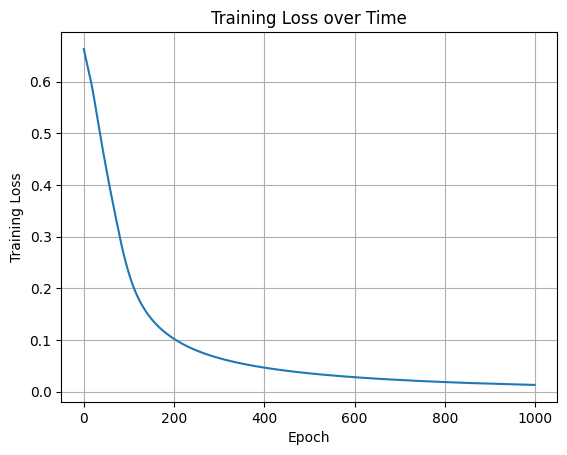


Training model with hidden layer size 7, iteration 3

Test Loss: 0.0267
[Parameter containing:
tensor([[-3.7107, -3.9876],
        [ 4.5795,  3.8427],
        [ 0.1286,  0.0537],
        [ 2.0380, -2.0910],
        [ 0.1632, -0.0845],
        [-4.0343,  3.8299],
        [ 3.7630, -3.4781]], requires_grad=True), Parameter containing:
tensor([ 0.3036, -0.4421, -0.4827,  0.0722, -0.8488, -0.1286,  0.1172],
       requires_grad=True), Parameter containing:
tensor([[ 4.0285,  4.1973,  0.0412, -2.0343,  0.2062, -4.1057, -3.4259]],
       requires_grad=True), Parameter containing:
tensor([-0.0430], requires_grad=True)]


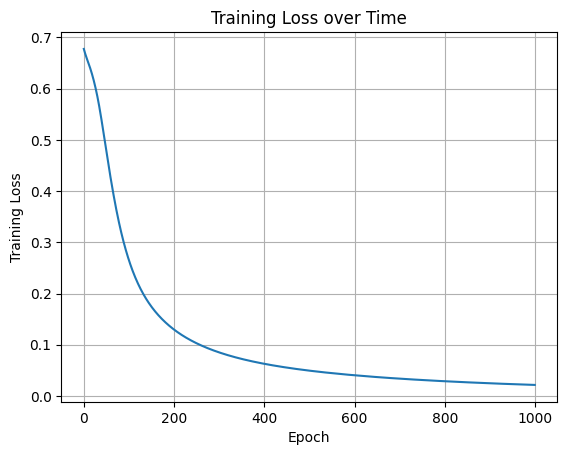

In [67]:
for i in range(2,8):
    for j in range(3):
        print(f'\nTraining model with hidden layer size {i}, iteration {j+1}')
        train_model(hl_size=i)